## Deicision Tree & Random Forest 개념

In [ ]:
# 필요한 package 불러오기

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

### Deicision Tree 생성
> with two-dimensional data (make_blobs) which has one of four class labels

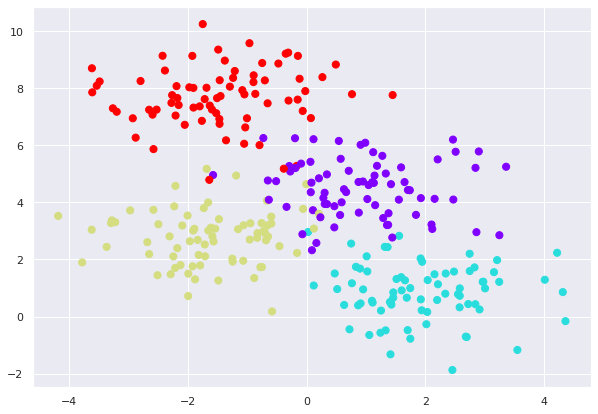

In [ ]:
# make_blobs data 생성/저장

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.figure(figsize = (10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

> Depth가 깊어짐에 따른 Split line 증가 및 클래스 분류 정확도 향상

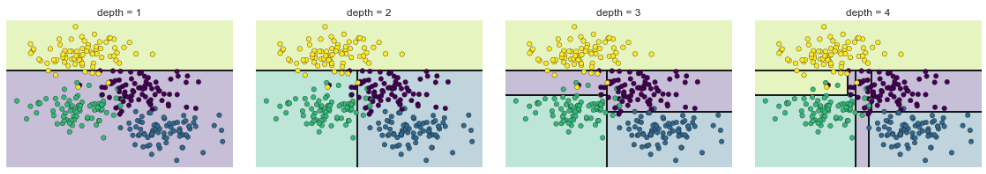

In [ ]:
from sklearn.tree import DecisionTreeClassifier # package 불러오기

# Decision Tree 정의
tree = DecisionTreeClassifier().fit(X, y)

# Decision Tree 적용 결과에 대한 visualize 함수
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), # x축
                         np.linspace(*ylim, num=200)) # y축
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) # np.c_: 배열 합치기(c_: 열방향 / r_: 행방향)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, # alpha: blending value, between 0 (transparent) and 1 (opaque)
                           levels=np.arange(n_classes + 1) - 0.5, # levels: Determines the number and positions of the contour lines & regions
                           cmap=cmap, clim=(y.min(), y.max()), # cmap: colormap
                           zorder=1) # zorder=1: Patch / PatchCollection, zorder=2: Line2D / LineCollection, zorder=3: Text

    ax.set(xlim=xlim, ylim=ylim)

<ipython-input-8-aedf5cbedc3e>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, # alpha: blending value, between 0 (transparent) and 1 (opaque)


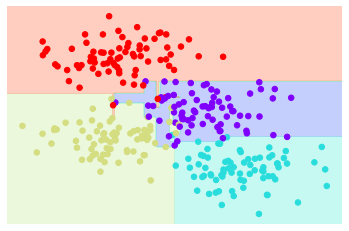

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

> Decision Tree의 Overfitting 위험성

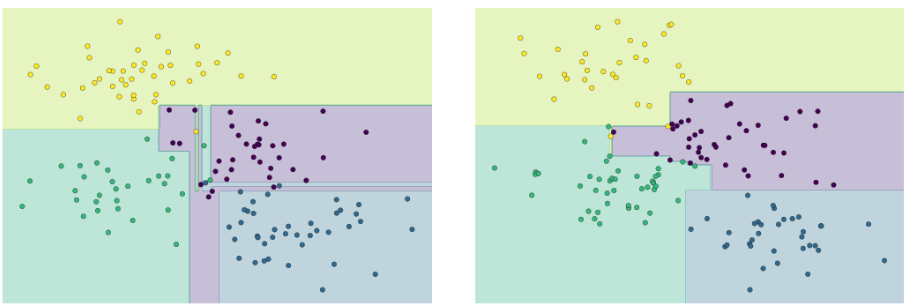

### Random Forest: Ensembles of Decision Trees

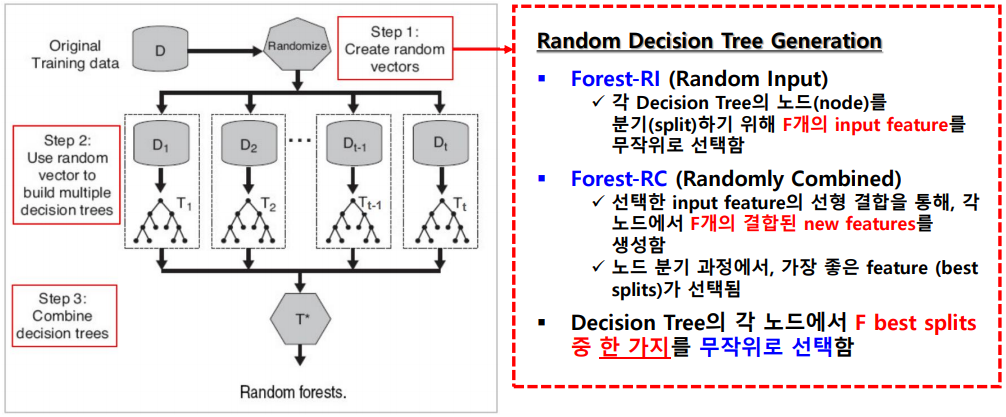

<ipython-input-8-aedf5cbedc3e>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, # alpha: blending value, between 0 (transparent) and 1 (opaque)


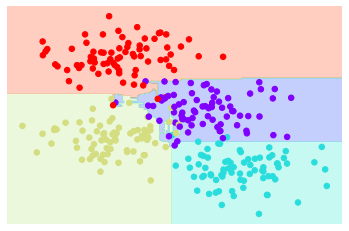

In [ ]:
# package 불러오기
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

'''
- 배깅: 각각 데이터를 과적합시키는 병렬 추정기의 앙상블(그랩 백, 아마도)을 사용하고 더 나은 분류를 찾기 위해 결과를 평균화하는 방식
- 랜덤 의사결정 트리의 앙상블은 랜덤 포레스트이며, 랜덤 포레스트는 배깅의 일종임
- 배깅 분류는 Scikit-Learn의 배깅 분류 메타 추정기를 사용하여 수동으로 수행할 수 있음
'''
tree = DecisionTreeClassifier() # Decision Tree 정의
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1) # Bagging

bag.fit(X, y)
visualize_classifier(bag, X, y)

<ipython-input-8-aedf5cbedc3e>:26: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, # alpha: blending value, between 0 (transparent) and 1 (opaque)


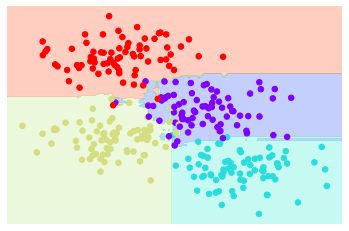

In [ ]:
# package 불러오기
from sklearn.ensemble import RandomForestClassifier

# RF 모델 정의
model = RandomForestClassifier(n_estimators=100, random_state=0) # averaging over 100 randomly perturbed models
visualize_classifier(model, X, y);

### 예제: Random Forest Regression

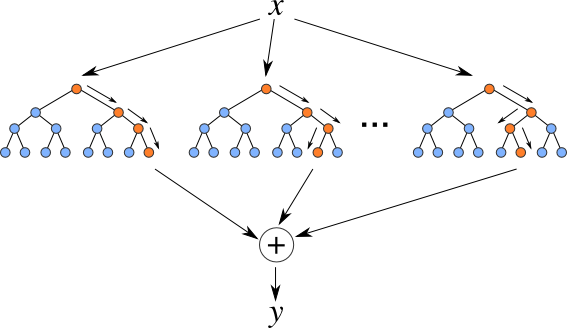

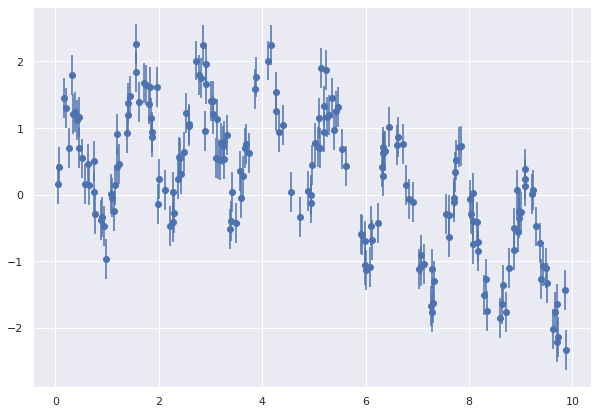

In [ ]:
# data 생성
rng = np.random.RandomState(42)
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.figure(figsize = (10,7))
plt.errorbar(x, y, 0.3, fmt='o');

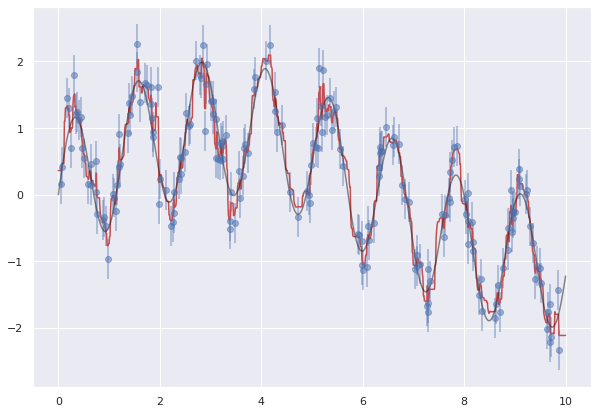

In [ ]:
# package 불러오기
from sklearn.ensemble import RandomForestRegressor

# RF Regressor 정의
forest = RandomForestRegressor(200)
forest.fit(x[:, None], y)

# visualize (find the best fit curve)
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.figure(figsize = (10,7))
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

### 예제: Random Forest Classification for Digits

In [ ]:
# package 불러오기 (data 불러오기)
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

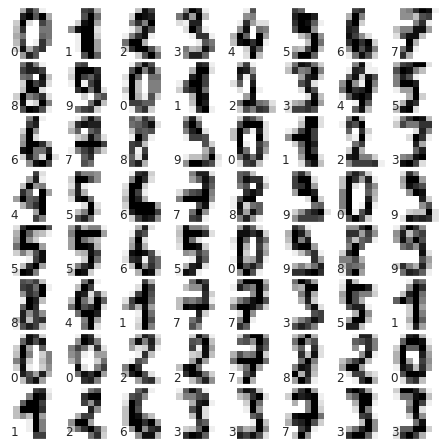

In [ ]:
# set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

In [ ]:
# package 불러오기
from sklearn.model_selection import train_test_split

# train/test data split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                               random_state=0)
# RF Classifier 학습
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
from sklearn import metrics

# 성능 평가표
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



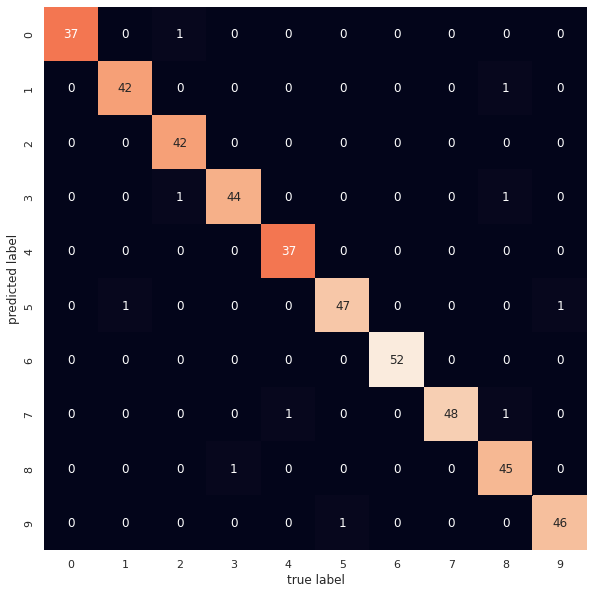

In [ ]:
from sklearn.metrics import confusion_matrix

# 성능평가표 (confusion matrix) 
plt.figure(figsize = (10, 10))
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('true label')
plt.ylabel('predicted label');